# 1 - Introduction :

Le but est de choisir le type de noyau adéquat dans mon classifieur SVM. 
La démarche consiste à tester plusieurs noyaux et afficher le résultat de la classification visuellement

Pour effectuer ce devoir, j’ai choisi le langage Python pour sa puissance, sa simplicité dans le sens ou il encapsule les algorithmes de machines learning les plus utilisés actuellement (librairie Sikit Learn).
J’ai choisi également de faire le devoir dans un Note Book Jupyter pour sa convivialité et aussi la possibilité de l’exporter au format HTML afin de le présenter en tant que rapport. 


In [3]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pylab as plt
import math
%matplotlib inline

# 2- Génération des jeux de données
Les données sont générées selon la méthode décrite dans l'énoncé

In [5]:
#genration donnees de la classe 0
mu, sigma = 0, 1 # mean and standard deviation
A1 = np.random.normal(mu, sigma, 1000).reshape(1000,1)
R1 = np.random.rand(1000,1) + 1.5;
X1 = np.concatenate(([R1*np.cos(A1) , R1 *np.sin(A1)+1 ]) ,axis=1 );
y1= np.full((1000, 1), 0 ,dtype=int)

#genration donnees de la classe 1
mu, sigma = math.pi, 1 # mean and standard deviation
A2 = np.random.normal(mu, sigma, 1000).reshape(1000,1)
R2 = np.random.rand(1000,1)+1.5;
X2 = np.concatenate(([R2*np.cos(A2) , R2 *np.sin(A2)-1 ]) ,axis=1 );
y2= np.full((1000, 1), 1 ,dtype=int)

#genration donnees de la classe 2
A3 = np.random.rand(1000,1) *2 * math.pi
R3 = np.random.rand(1000,1)*2 + 5;
X3 = np.concatenate((R3*np.cos(A3) , R3 *np.sin(A3)),axis=1 );
y3= np.full((1000, 1), 2 ,dtype=int)

X= np.concatenate((X1,X2,X3),axis=0)
y= np.concatenate((y1,y2,y3),axis=0)
y= y.reshape(3000,)

### 2.1 Visalisation des jeux de données

Automatically created module for IPython interactive environment


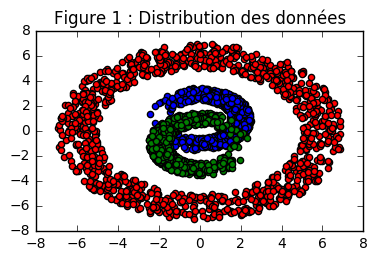

In [21]:
print(__doc__)
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(324)
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1], c='g')
plt.scatter(X3[:, 0], X3[:, 1], c='r')
plt.title('Figure 1 : Distribution des données')
plt.show()

# 3- Choix du classifieur
D'après le shémas ci-dessus représenant la distribution du jeux données, un classifieur linéaire ne pourra répondre au besoin. 
De ce fait, je vais d'embler utiliser un classifieur SVM non linéaire. 

In [7]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    '''
    Display classifier and data with labels
    '''
    estimator.fit(X, y)
    #Echelle et grille
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #Separateur
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    #Diplay label color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Sample color 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

In [19]:
svc = svm.SVC(kernel='poly')

### Paramètres par défaut du classifieur SVM dans Python
Les paramètres par défaut du classifieur sont : 

C= 1.0, 
gamma = 1/n_features dans notre cas, 1/1000 donc 0,001 

In [22]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# 4- Choix du noyau (kernel) à utiliser dans le classifieur SVM
Le but est de choisir le type de noyau adéquat dans mon classifieur SVM. 
La démarche consiste à tester plusieurs noyaux et afficher le résultat de la classification visuellement.
### 4.1 Noyau Polynomial :
D'après le la figure 2, le résultat de la classification avec un noyau polynomial n'est pas efficace. 

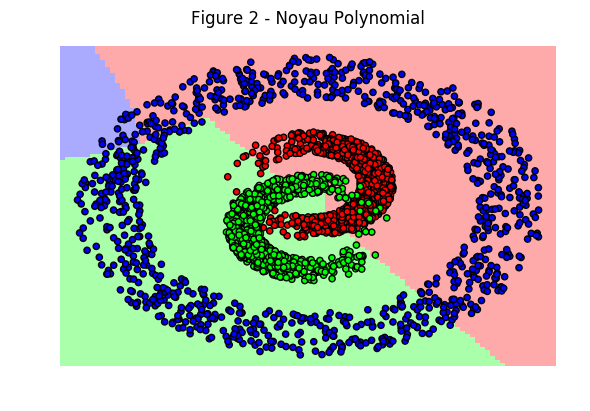

In [23]:
plot_estimator(svc, X, y)
plt.title('Figure 2 - Noyau Polynomial')

### 4. 2- Noyau RBF (Radial basis function kernel):
D'après le la figure 3, le résultat de la classification avec un noyau RBF semble la meilleure solution. 

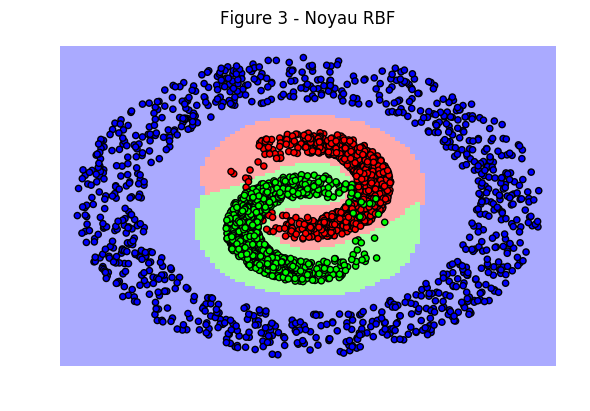

In [8]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, y)
plot_estimator(svc, X, y)
plt.title('Figure 3 - Noyau RBF')

# 5 - Paramétrage et entrainement du classifieur

Maintenant que le choix du classifieur est fait, il faut trouver les meilleurs paramètres du classifieur et de fixer les métrics pour évaluer sa performance.

### 5.1 Séparation entre jeux de d'entrainement et jeux de test
- 3/4 des données seront utilisés pour l'apprentissage et 1/4 pour le test

### 5.2 Les paramètres à varier
Les paramètres à varier sont gamma et C.
    La fonction "GridSearch" de la librairie "Sikit Learn" fait varier automatiquement les variables qu'on lui passe en paramètres
Pour chaque itération on affiche la probabilité des vrais positif pour une combinaison de gamma et C


In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
# Set the parameters by cross-validation
tuned_parameters = [{'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

scores = ['recall']

#for score in scores:

clf = GridSearchCV(svc, tuned_parameters, cv=5,
                     scoring='%s_macro' % 'recall')
clf.fit(X_train, y_train)
print("Meilleurs paramètres C et gamma:")
print()
print(clf.best_params_)
print()
print("Matrice de Probabilité de vrais positive en fonction des paramètres testés:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) pour %r"% (mean, std * 2, params))
print()


Meilleurs paramètres C et gamma:

{'C': 100, 'gamma': 0.001}

Matrice de Probabilité de vrais positive en fonction des paramètres testés:

0.679 (+/-0.031) pour {'C': 1, 'gamma': 0.001}
0.585 (+/-0.013) pour {'C': 1, 'gamma': 0.0001}
0.926 (+/-0.014) pour {'C': 10, 'gamma': 0.001}
0.591 (+/-0.017) pour {'C': 10, 'gamma': 0.0001}
0.927 (+/-0.014) pour {'C': 100, 'gamma': 0.001}
0.683 (+/-0.028) pour {'C': 100, 'gamma': 0.0001}
0.927 (+/-0.013) pour {'C': 1000, 'gamma': 0.001}
0.926 (+/-0.014) pour {'C': 1000, 'gamma': 0.0001}

